# Goal

Noble Marketing team wants to release a survey using Ordinal Likert Scale to accurately collect data and Open ended question.  The goal of this notebook is to score the most likely score of each response from the client


# EDA
In this section, we shall use the sample file from Amazon reviews 
#Source:
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Wireless_v1_00.tsv.gz

this is pre-converted from .tsv to .csv from an earlier download. 




### Information About Data

1. marketplace        feature
2. customer_id        feature 
3. review_id          feature 
4. product_id         feature
5. product_parent     feature
6. product_title      feature
7. product_category   feature
8. star_rating        label
9. helpful_votes      feature
10. total_votes       feature
11. vine              feature
12. verified_purchase feature
13. review_headline   feature 
14. review_body       feature 
15. review_date       feature 

In [131]:
# Import libraries
import pandas as pd
import numpy as np

import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt

# Section 1 - read csv file
I converted the tsv file (1.1gb) into .csv file around 1mm records and 500mb file  but i planned to use at most, 20K records.

procedure -cleaning data 

1. upload the database to colab and assign it into a data frame variable name sentimentDf. I  
2. check the column header by executing .head()
3. delete unimportant columns 

In [132]:
sentimentDf = pd.read_csv('./amazon_reviews_us_Wireless_sampling.csv')

In [133]:
sentimentDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        19999 non-null  object
 1   customer_id        19999 non-null  int64 
 2   review_id          19999 non-null  object
 3   product_id         19999 non-null  object
 4   product_parent     19999 non-null  int64 
 5   product_title      19999 non-null  object
 6   product_category   19999 non-null  object
 7   star_rating        19999 non-null  int64 
 8   helpful_votes      19999 non-null  int64 
 9   total_votes        19999 non-null  int64 
 10  vine               19999 non-null  object
 11  verified_purchase  19999 non-null  object
 12  review_headline    19999 non-null  object
 13  review_body        19995 non-null  object
 14  review_date        19999 non-null  object
dtypes: int64(5), object(10)
memory usage: 2.3+ MB


In [134]:
sentimentDf.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,16414143,R3W4P9UBGNGH1U,B00YL0EKWE,852431543,LG G4 Case Hard Transparent Slim Clear Cover f...,Wireless,2,1,3,N,Y,"Looks good, functions meh",2 issues - Once I turned on the circle apps ...,8/31/2015
1,US,50800750,R15V54KBMTQWAY,B00XK95RPQ,516894650,Selfie Stick Fiblastiq&trade; Extendable Wirel...,Wireless,4,0,0,N,N,A fun little gadget,"I’m embarrassed to admit that until recently, ...",8/31/2015
2,US,15184378,RY8I449HNXSVF,B00SXRXUKO,984297154,Tribe AB40 Water Resistant Sports Armband with...,Wireless,5,0,0,N,Y,Five Stars,Fits iPhone 6 well,8/31/2015
3,US,10203548,R18TLJYCKJFLSR,B009V5X1CE,279912704,RAVPower® Element 10400mAh External Battery US...,Wireless,5,0,0,N,Y,Great charger,Great charger. I easily get 3+ charges on a S...,8/31/2015
4,US,488280,R1NK26SWS53B8Q,B00D93OVF0,662791300,Fosmon Micro USB Value Pack Bundle for Samsung...,Wireless,5,0,0,N,Y,Five Stars,Great for the price :-),8/31/2015


In [135]:
#dropping unneeded columns
toDrop =['marketplace','customer_id','review_id','product_id','product_parent','helpful_votes','total_votes','product_title','product_category','vine','verified_purchase','review_headline',	'review_date']
print(toDrop)

['marketplace', 'customer_id', 'review_id', 'product_id', 'product_parent', 'helpful_votes', 'total_votes', 'product_title', 'product_category', 'vine', 'verified_purchase', 'review_headline', 'review_date']


In [136]:
sentimentDf.drop(toDrop,axis=1,errors='ignore', inplace=True)

In [137]:
sentimentDf.head()

,star_rating,review_body
0,2,2 issues - Once I turned on the circle apps ...
1,4,"I’m embarrassed to admit that until recently, ..."
2,5,Fits iPhone 6 well
3,5,Great charger. I easily get 3+ charges on a S...
4,5,Great for the price :-)


In [138]:
sentimentDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   star_rating  19999 non-null  int64 
 1   review_body  19995 non-null  object
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


## Section 2 
this is to show that I would only need the star rating given by the commenter to check if it is a positive or negative view 

a positive view will be rated 1 (4-5 stars) 0 for neutral (3 stars) and -1 for (1-2) stars

hence if star_rating => 4 to 5 then 1
         star_rating = 3 then 0 
         star_rating = 0 to 2 then -1 

# review_body will be retained as is 

In [139]:
# Convert 'star_rating' to -1,0 1 
# .map() will map values in the original to values in the specified data
star_ratingFlag = {
    1 : 0,
    2 : 0,
    3 : 3,
    4 : 1,
    5 : 1
}

sentimentDf['star_rating'] = sentimentDf['star_rating'].map(star_ratingFlag)
sentimentDf.head()

,star_rating,review_body
0,0.0,2 issues - Once I turned on the circle apps ...
1,1.0,"I’m embarrassed to admit that until recently, ..."
2,1.0,Fits iPhone 6 well
3,1.0,Great charger. I easily get 3+ charges on a S...
4,1.0,Great for the price :-)


## Section 3 saving it to amazon_reviews-cleaned

In [140]:
# Export new file from updated data frame
sentimentDf.to_csv('./amazon_review-cleaned.csv', index=False)

# Features
#Capstone Project - Sentiment Analysis
##Milestone No. 2
 Data Engineering II: Exploratory data analysis and feature engineering

 I would identify that the labe shall be the star_rating and the feature would be the review_body 

 As previously done in Milestone No. 1, Section 2, I reduced the reviews from Postive and Negative with the star_rating  


 star_rating => 4 to 5 then 1 star_rating = 3 then 0 star_rating = 0 to 2 then -1

 I would then delete neutral rate "0" as this would contribute as false positive or false negative view and double check for null response and clean them as well.

then create test data  and train data (60/40)

In [141]:
# Import libraries
import pandas as pd
import numpy as np


# The train_test_split method will allow to split files and 
# randomly sample from the whole data
from sklearn.model_selection import train_test_split

In [142]:
#importing data
sentimentDf = sentimentDf = pd.read_csv('./amazon_review-cleaned.csv')

#Section 1 
Checking zero false positive and false negative score
checking null response.

In [143]:
#check the dataset
sentimentDf.head(50)
#it can bee sen that there are false positive and false negative comments for 3

,star_rating,review_body
0,0.0,2 issues - Once I turned on the circle apps ...
1,1.0,"I’m embarrassed to admit that until recently, ..."
2,1.0,Fits iPhone 6 well
3,1.0,Great charger. I easily get 3+ charges on a S...
4,1.0,Great for the price :-)
5,1.0,"Great Case, better customer service!"
6,1.0,Easy to set up and use. Great functions for th...
7,1.0,Works great
8,1.0,So far so good. It is essentially identical to...
9,0.5,seems durable but these are always harder to g...


In [144]:
sentimentDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   star_rating  19999 non-null  float64
 1   review_body  19995 non-null  object 
dtypes: float64(1), object(1)
memory usage: 312.6+ KB


In [145]:
#deleting star_rating = 0.50
sentimentDf =  (sentimentDf[sentimentDf["star_rating"]!=3])

In [146]:
#check where review_body = null 
sentimentDf[ sentimentDf["review_body"].isnull()== True]

,star_rating,review_body
7675,1.0,NaN
13411,0.0,NaN
13491,1.0,NaN
17286,1.0,NaN


In [147]:
#deleting null from the dataset
sentimentDf = sentimentDf[sentimentDf['review_body'].notna()]

In [148]:
#checking again if there are null values in data set

sentimentDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18382 entries, 0 to 19998
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   star_rating  18382 non-null  float64
 1   review_body  18382 non-null  object 
dtypes: float64(1), object(1)
memory usage: 430.8+ KB


# Section 2 - Creating Test and train Data

In [149]:
sentimentDf

,star_rating,review_body
0,0.0,2 issues - Once I turned on the circle apps ...
1,1.0,"I’m embarrassed to admit that until recently, ..."
2,1.0,Fits iPhone 6 well
3,1.0,Great charger. I easily get 3+ charges on a S...
4,1.0,Great for the price :-)
...,...,...
19994,1.0,I love the way that I can easily dial up a num...
19995,1.0,"purchased for my husband, a general contractor..."
19996,1.0,"Not sure if I wanted a wallet type case, but a..."
19997,1.0,Great case for the price... I used it for abou...


In [150]:
##Create two dataframes, sentimentFeature and sentimentLabel
sentimentLabel = sentimentDf['star_rating']
sentimentFeature = sentimentDf['review_body']

#split into 60/40 train and test.

sTrainF, sTestF, sTrainL, sTestL = train_test_split(sentimentFeature,sentimentLabel, test_size=0.4, random_state = 12034)

In [151]:
for dataset in [sTestF,sTrainF]:
  ratio = round(len(dataset)/len(sentimentFeature),2)
  print(ratio)

0.4
0.6


In [152]:
#exporting to CSV

#train (60%)
sTrainF.to_csv('./Sentiment_Feature_train.csv', index=False)
sTestF.to_csv('./Sentiment_Feature_test.csv', index=False)

#test (40%)
sTrainL.to_csv('./Sentiment_Label_train.csv', index=False)
sTestL.to_csv('./Sentiment_Label_test.csv', index=False)

# Machine Learning

Capstone Project - Sentiment Analysis
Milestone No. 3
Machine Learning I: Model selection and hyperparameter tuning

I have thoroughly prepared the data for model selection

In [153]:
# Import libraries



#Section 1 
import test and train datasets

In [154]:
#importing data
trainF = pd.read_csv('./Sentiment_Feature_train.csv')
train_Df = trainF
trainL = pd.read_csv('./Sentiment_Label_train.csv')
testF = pd.read_csv('./Sentiment_Feature_test.csv')
test_Df = testF 
testL = pd.read_csv('./Sentiment_Label_test.csv')

In [155]:
train_Df['star_rating'] = trainL['star_rating']
test_Df['star_rating'] = testL['star_rating']

In [156]:
train_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11029 entries, 0 to 11028
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   review_body  11029 non-null  object 
 1   star_rating  11029 non-null  float64
dtypes: float64(1), object(1)
memory usage: 172.5+ KB


In [157]:
test_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7353 entries, 0 to 7352
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   review_body  7353 non-null   object 
 1   star_rating  7353 non-null   float64
dtypes: float64(1), object(1)
memory usage: 115.0+ KB


In [158]:
featuresTrain=train_Df['review_body']
labelTrain =train_Df['star_rating']

featuresTest=test_Df['review_body']
labelTest =test_Df['star_rating']

#Section 2 - converting from Panda Data set to Tensor data dset

In [159]:
trainData = (tf.data.Dataset.from_tensor_slices((featuresTrain.values, labelTrain.values))).prefetch(1)
testData = (tf.data.Dataset.from_tensor_slices((featuresTest.values, labelTest.values))).prefetch(1)

In [160]:
trainData, testData

(<PrefetchDataset shapes: ((), ()), types: (tf.string, tf.float64)>,
 <PrefetchDataset shapes: ((), ()), types: (tf.string, tf.float64)>)

In [161]:
#Testing if my panda dataset became tensor dataset successfully

for featuresTrain, labelTrain in trainData.take(10):
  print('features: {},\t Target: {}\n'.format(featuresTrain.numpy(),labelTrain.numpy()))

features: b'Great for price!',	 Target: 1.0

features: b'Cheap quality and does not fit phone.',	 Target: 0.0

features: b'Sound quality is pretty good (heavy on the bass). They pinch my ears a bit, so if you have a larger head they might not be for you.',	 Target: 1.0

features: b'Heavy duty cable that works with my iPhone 5s. Will buy again.',	 Target: 1.0

features: b'Received product fast and as described',	 Target: 1.0

features: b'Great fit. But pretty slippery.',	 Target: 1.0

features: b"Worked great for 4 days. Then it wouldn't charge. Every time I tried to charge it, it would reset and just vibrate. Tried to contact the seller, but the language barrier made it all but impossible. Shipped on time and in good condition.",	 Target: 0.0

features: b'great Product.no instructions but look it up on YouTube',	 Target: 1.0

features: b'I was very satisfied with the delivery time and the product.',	 Target: 1.0

features: b'Like the phone. Still having trouble with downloading photos 

##Milestone No. 4
Machine Learning II: Metrics results and documentation

I have now to understand how RNN works



###Start to prepare for autotuning

In [162]:
# bufferSize is the maximum number of tokens in any text input
bufferSize = 10000

# batchSize is the number of samples to propagate the network
batchSize = 64

# .shuffle() random suffle of data
# .batch() select a batch of samples for the network
# .prefetch() cache data while preceeding data is processed

trainData = trainData.shuffle(buffer_size=bufferSize).batch(batchSize).prefetch(tf.data.AUTOTUNE)
testData = testData.batch(batch_size=batchSize).prefetch(tf.data.AUTOTUNE)

#The Tokenization and Sequence Encoding

![image.png](https://www.kdnuggets.com/wp-content/uploads/text-tokens-tokenization-manning.jpg)

![image.png](https://www.oreilly.com/library/view/applied-text-analysis/9781491963036/assets/atap_0408.png)

In [163]:
# vocabSize is the number of unique of words
vocabSize = 1000

# TextVectorization will convert words to vector of tokens
# For example, go from "Man on the moon" to ["man", "on", "the", "moon"]
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens=vocabSize)

# Use .map() to exclude the label and return only the text from data
tokensOnly = trainData.map(lambda text, label: text)

# .adapt() will apply encoding to tokens only
encoder.adapt(tokensOnly)

In [164]:
encoder

In [165]:
vocab = np.array(encoder.get_vocabulary())

In [166]:
vocab[4:35]

array(['it', 'and', 'a', 'to', 'is', 'my', 'this', 'for', 'of', 'phone',
       'in', 'on', 'with', 'case', 'not', 'great', 'that', 'but', 'was',
       'have', 'you', 'as', 'very', 'so', 'good', 'one', 'product', 'its',
       'works', 'love', 'like'], dtype='<U13')

In [167]:
encodedExample = encoder(featuresTrain)[4:35].numpy()
encodedExample

array([301, 957,  16,   1, 806,  14,   1])

In [168]:
# Build the RNN
# Here, we're using Bidirectional technique, which means
# the data (reviews) will be analyzed left-to-right AND
# right-to-left
modelRNN = tf.keras.Sequential(
    [
        encoder,
        tf.keras.layers.Embedding(
            input_dim=len(encoder.get_vocabulary()), 
            output_dim=64,
            mask_zero=True
        ),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1),
    ]
)

In [169]:
modelRNN.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False, label_smoothing=0), 
    optimizer='adam', 
    metrics=['accuracy']
)    

#Use of from_logits= False

Use this cross-entropy loss for binary (0 or 1) classification applications. The loss function requires the following inputs:

y_true (true label): This is either 0 or 1.
y_pred (predicted value): This is the model's prediction, i.e, a single floating-point value which either represents a logit, (i.e, value in [-inf, inf] when from_logits=True) or a probability (i.e, value in [0., 1.] when from_logits=False).

Mathematically, the logit is the inverse of the standard logistic function 





![image.png](https://www.machinecurve.com/wp-content/uploads/2019/10/bce_t0-1024x459.png)

In [170]:
# I used 6 epochs to attain higher accuracies
metrics = modelRNN.fit(
    trainData,
    epochs=10
)



Epoch 1/6
173/173 [==============================] - 115s 606ms/step - loss: 0.7519 - accuracy: 0.6817
Epoch 2/6
173/173 [==============================] - 104s 604ms/step - loss: 0.3186 - accuracy: 0.8842
Epoch 3/6
173/173 [==============================] - 106s 609ms/step - loss: 0.2332 - accuracy: 0.9168
Epoch 4/6
173/173 [==============================] - 104s 599ms/step - loss: 0.3618 - accuracy: 0.8348
Epoch 5/6
173/173 [==============================] - 105s 604ms/step - loss: 0.2437 - accuracy: 0.9186
Epoch 6/6
173/173 [==============================] - 106s 611ms/step - loss: 0.2046 - accuracy: 0.9379


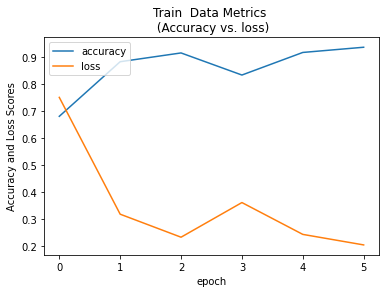

In [171]:
#plotting the accuracy and loss 
#per last run, I was able to attain 96% accuracy and loss of 8.68%
plt.plot(metrics.history['accuracy'])
plt.plot(metrics.history['loss'])
plt.title('Train  Data Metrics \n (Accuracy vs. loss)')
plt.ylabel('Accuracy and Loss Scores')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

In [172]:
# Check metrics after test (evaluate)
testLoss, testAccuracy = modelRNN.evaluate(testData)

print('Loss: ', testLoss)
print('Accuracy: ', testAccuracy)

115/115 [==============================] - 22s 166ms/step - loss: 0.4052 - accuracy: 0.9066
Loss:  0.4052228331565857
Accuracy:  0.9065687656402588


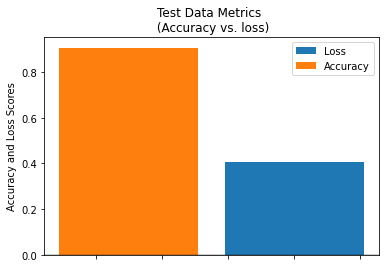

In [173]:
# Visualize the metrics
fig, ax = plt.subplots()

p1 = ax.bar(0.5, testLoss, 0.21, bottom=None, label='Loss')
p2 = ax.bar(0.25, testAccuracy, 0.21, bottom=None, label='Accuracy')

ax.axhline(0, color='black', linewidth=0.4)
ax.set_ylabel('Accuracy and Loss Scores')
ax.set_title('Test Data Metrics \n (Accuracy vs. loss)')
ax.set_xticklabels((' ',  ' '))
ax.legend()

plt.show()

In [174]:
# Predict a review
sampleMovieReview = [
    'What a great movie!! Would definitely watch again',
    'worse bad no not dont '
]

predictions = modelRNN.predict( np.array(sampleMovieReview) )

In [175]:
print(predictions)

[[1.619656  ]
 [0.07306113]]


# Decision

We will conclude our project in this section. Here, we will demonstrate how the model is able to make predictions (e.g, Regression or Classification) for newly generated data, highlight the strengths and weakness of the trained model, and propose ideas that could further improve the performance of the model (e.g, tuning Hyperparameters, using alternative ML models, further EDA, etc.)   